<a href="https://colab.research.google.com/github/eltongaspar/advpl/blob/Advpl/%23Exercicio-74-Reconhecimento%20de%20Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade de experimentação 73
Detecção de texto em imagens com o detector EAST

Atividade de experimentação 74
Reconhecimento de texto com EasyOCR

In [1]:
#Instalação e importação das bibliotecas
# Instalação da biblioteca EasyOCR
!pip install easyocr

# Código necessário após atualização do opencv-python-headless no Colab para a versão 4.5.5.62, que não suporta o "_registerMatType".
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

!pip install opencv-python-headless

# Importação das bibliotecas necessárias
import cv2
from easyocr import Reader
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import zipfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [2]:
# Configuração dos idiomas para o OCR
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')
print(idiomas)

# Definição da utilização da GPU
gpu = True #@param {type: 'boolean'}

['en', 'pt']


In [3]:
#Conectando com o Drive e acessando os arquivos
# Conectando o Colab ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Realize o dowload da pasta Material_complementar_reconhecimento_voz.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
#path = "/content/drive/MyDrive/Material_complementar_reconhecimento_texto.zip"
#zip_object = zipfile.ZipFile(file=path, mode="r")
#zip_object.extractall("./")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


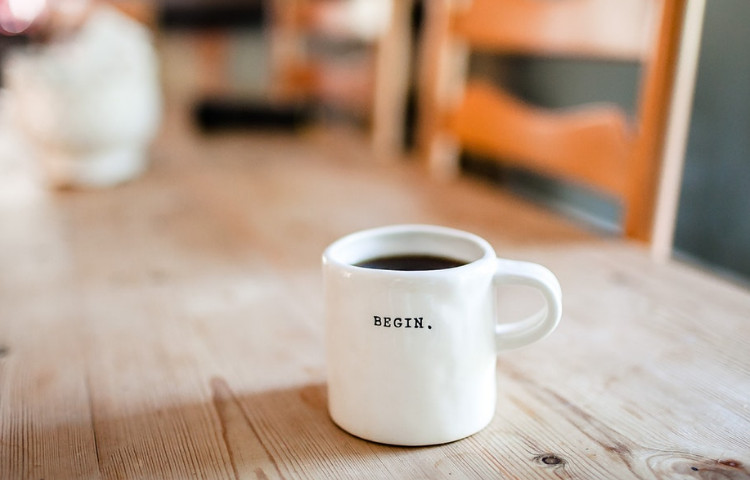

In [4]:
# Carregamento e exibição da imagem a ser processada
img = cv2.imread('/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/imagens/caneca.jpg')
cv2_imshow(img)
original = img.copy()

In [13]:
#Reconhecimento (OCR)
# Inicialização do EasyOCR com os idiomas especificados e realização do OCR
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)


In [14]:
#Escrevendo os resultados na imagem
# Estabelece a fonte do texto
fonte = '/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/fontes/calibri.ttf'

# Função para escrever texto na imagem
def escreve_texto(texto, x, y, img, fonte, cor=(50,50,255), tamanho = 22):
  fonte = ImageFont.truetype(fonte, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img


Caixa delimitadora
Cantos da bounding box:

te = topo esquerdo (superior esquerdo)
td = topo direito (superior direito)
bd = baixo direito (inferior direito)
be = baixo esquerdo (inferior esquerdo)

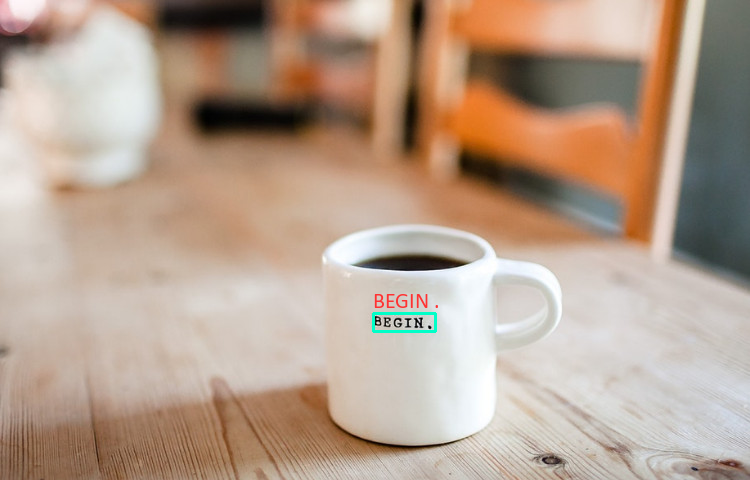

In [15]:
# Função para obter coordenadas da caixa delimitadora
def coordenada_caixa(caixa):
  (te, td, bd, be) = caixa
  te = (int(te[0]), int(te[1]))
  td = (int(td[0]), int(td[1]))
  bd = (int(bd[0]), int(bd[1]))
  be = (int(be[0]), int(be[1]))
  return te, td, bd, be

  # Função para desenhar caixa delimitadora na imagem
def desenha_caixa(img, te, bd, cor_caixa=(200,255,0), espessura=2):
  cv2.rectangle(img, te, bd, cor_caixa, espessura)
  return img

  # Aplicação das funções para desenhar caixas delimitadoras e escrever texto na imagem
img = original.copy()
for (caixa, texto, probabilidade) in resultados:
  #print(caixa, texto, probabilidade)
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

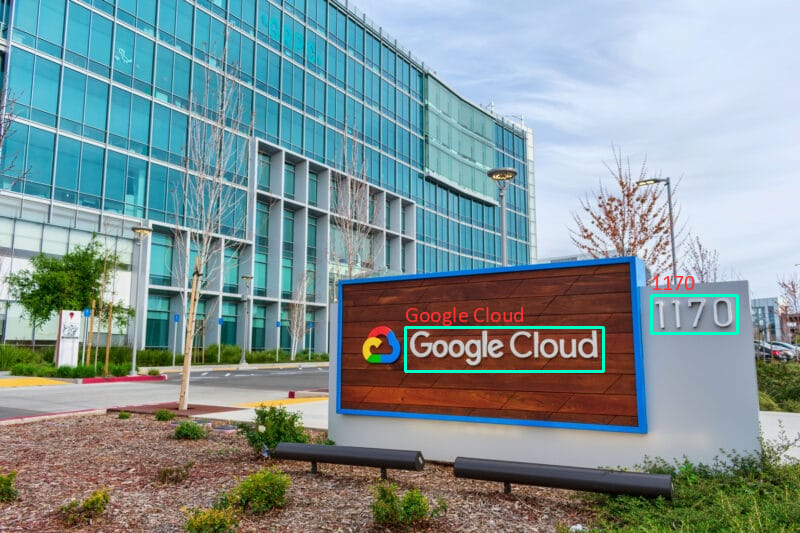

In [16]:
# Processamento de outra imagem com EasyOCR
img = cv2.imread('/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/imagens/google-cloud.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)


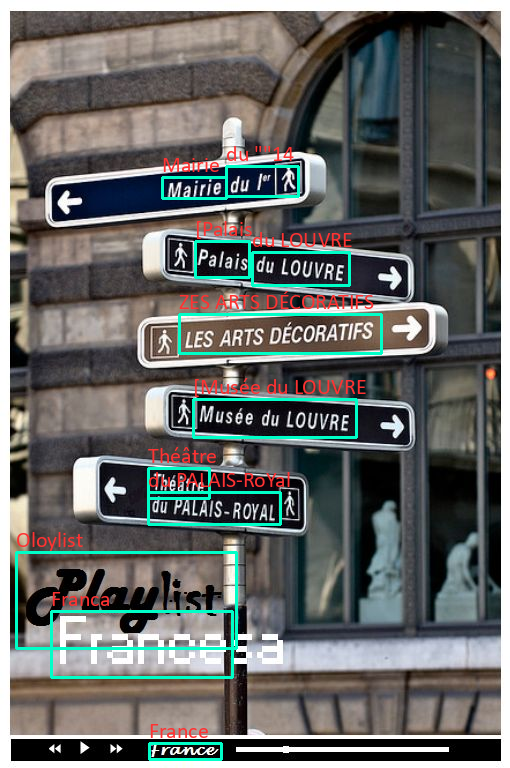

In [17]:
#Outros idiomas

# Teste do EasyOCR com idioma francês
lista_idiomas = 'en,fr'
idiomas = lista_idiomas.split(',')
idiomas

# Processamento de outra imagem com EasyOCR
img = cv2.imread('/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/imagens/frances.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

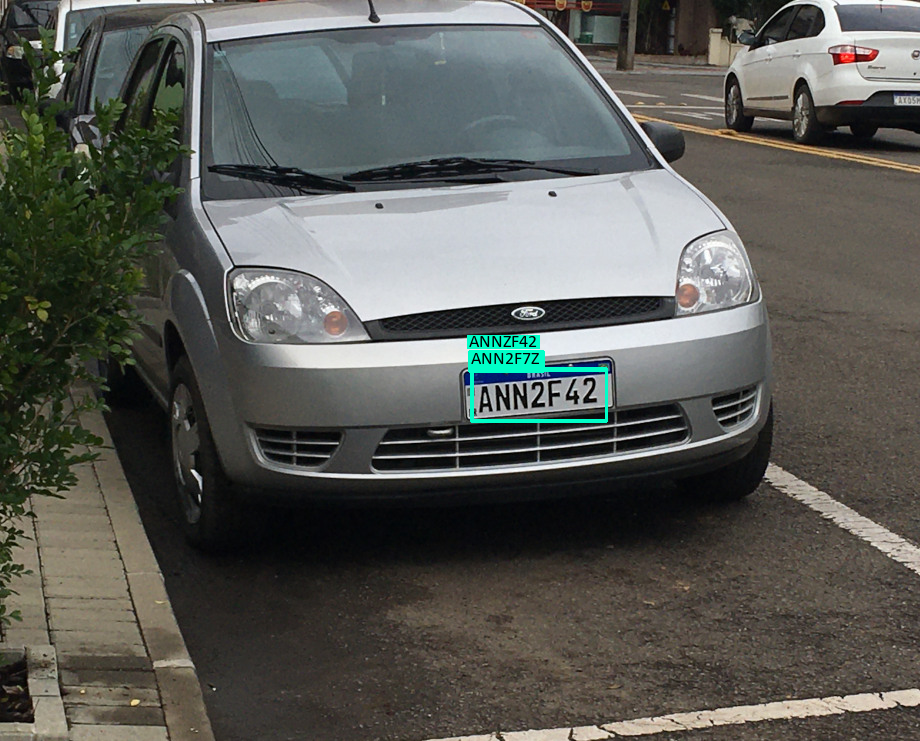

In [19]:
#Texto com fundo
# Função para adicionar fundo ao texto na imagem
def fundo_texto(texto, x, y, img, fonte, tamanho=32, cor_fundo=(200,255,0)):
  fundo = np.full((img.shape), (0,0,0), dtype=np.uint8)
  texto_fundo = escreve_texto(texto, x, y, fundo, fonte, tamanho=tamanho)
  texto_fundo = cv2.dilate(texto_fundo,(np.ones((3,5),np.uint8)))
  fx,fy,fw,fh = cv2.boundingRect(texto_fundo[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), cor_fundo, -1)
  return img

fonte = '/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/fontes/calibri.ttf'
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')

img = cv2.imread('/content/drive/MyDrive/Classroom/Inteligência Artificial aplicada à Visão Computacional Turma 99 - 6: 01 02 a 31 05 2024/Material_complementar_reconhecimento_texto/imagens/carro01.png')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

cor_fonte = (0,0,0)
cor_fundo = (200,255,0)
cor_caixa = (200,255,0)
tamanho_fonte = 18

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd, cor_caixa)
  img = fundo_texto(texto, te[0], te[1], img, fonte, tamanho_fonte, cor_fundo)
  img = escreve_texto(texto, te[0], te[1], img, fonte, cor_fonte, tamanho_fonte)
cv2_imshow(img)


